In [1]:
import mplfinance as mpf
import pymssql
import json
import pandas as pd
import numpy as np

db_settings = {
    "host": "127.0.0.1",
    "port": 1433,
    "user": "johnnyhsu",
    "password": "12345678",
    "database": "ncu_database",
    "charset": "UTF-8"
}

In [2]:
try:  
    conn = pymssql.connect(**db_settings)
    with conn.cursor() as cursor:
        command = "SELECT date, o, h, l, c, v FROM price_history WHERE date like '2022-12-%' and stock_code = '2330';"
        cursor.execute(command)
        result = cursor.fetchall()
except Exception as ex:
    print(ex)

conn.close()

In [3]:
arr = []
for r in result:
    r = list(r)
    r[0] = r[0];
    r[1] = float(r[1])
    r[2] = float(r[2])
    r[3] = float(r[3])
    r[4] = float(r[4])
    r[5] = float(r[5])
    arr.append(r)

In [4]:
arr_df = pd.DataFrame(arr)
arr_df.index = pd.to_datetime(arr_df[0])
arr_df = arr_df.drop(columns=[0])
arr_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
arr_df.index.name = "Date"
arr_df

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-01,506.0,508.0,498.5,498.5,46181.0
2022-12-02,490.0,497.0,490.0,492.5,31799.0
2022-12-05,491.5,497.5,489.0,489.0,31739.0
2022-12-06,488.0,489.0,478.0,478.0,44448.0
2022-12-07,477.0,485.5,475.0,475.0,43603.0
2022-12-08,475.0,475.0,467.0,471.5,45114.0
2022-12-09,478.0,484.5,476.0,481.5,25790.0
2022-12-12,476.5,478.0,473.5,475.0,34393.0
2022-12-13,473.0,476.0,471.0,471.5,36559.0


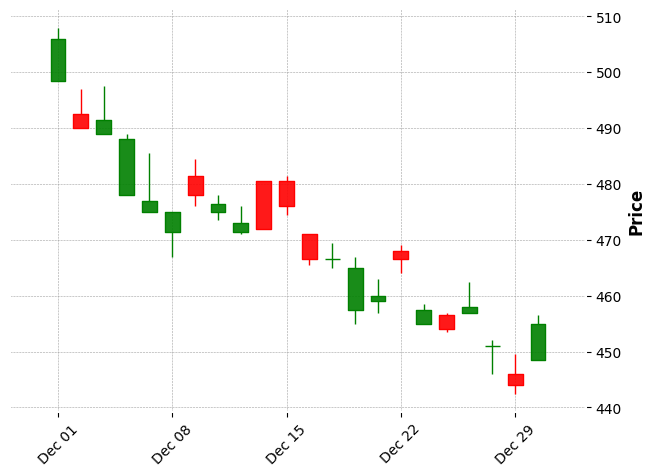

In [5]:
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc)

mpf.plot(arr_df, type='candle', style=s)